In [1]:
%matplotlib inline

In [2]:
import itertools

In [3]:
import numpy as np

In [4]:
import torchvision.transforms

In [5]:
import matplotlib.pyplot as plt

In [8]:
import config
from utils.torch.datasets import PathologicalImagesDataset, PathologicalImagesDatasetMode
from utils.torch.transforms import ImageMaskTransformsCompose, RandomHorizontalFlip, \
RandomVerticalFlip, RandomTranspose, SamplePatch, MaskToTensor, CopyNumpy, Add, ContrastNormalization, \
Rotate, Rotate90n

# Dataset

In [9]:
dataset = PathologicalImagesDataset(config.DATASET_TRAIN_DIR, mode=PathologicalImagesDatasetMode.All)

# Plot some images

In [10]:
i = 0

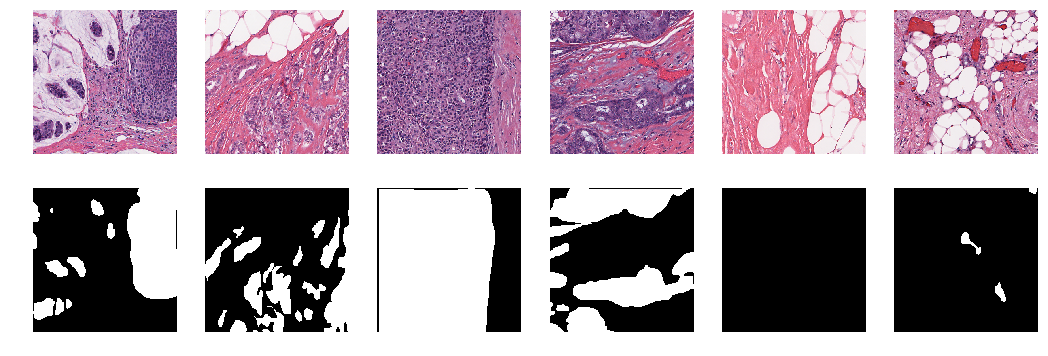

In [16]:
fig, (axes_img, axes_mask) = plt.subplots(2, 6, figsize=(18, 6))
for ax_img, ax_mask in zip(axes_img, axes_mask):
    image, mask = dataset[i]
    
    ax_img.imshow(image)
    ax_img.set_axis_off()

    ax_mask.imshow(mask, cmap='gray')
    ax_mask.set_axis_off()    

    i += 1

# Test augmentation

In [10]:
image, mask = dataset[1]

In [11]:
image.shape, mask.shape

((500, 500, 3), (500, 500))

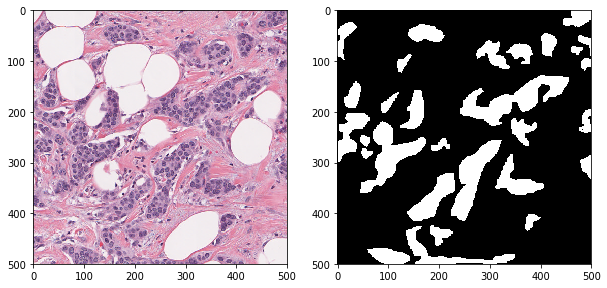

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(image)
ax2.imshow(mask, cmap='gray')

## Test some tranfrorms

In [26]:
transform = ImageMaskTransformsCompose([
#     SamplePatch(224),
#     RandomTranspose(),
#     RandomVerticalFlip(),
#     RandomHorizontalFlip(),
    Add(-50, 50, per_channel=False),
    ContrastNormalization(0.5, 1.5, per_channel=False),
    Rotate(-30, 30, mode='reflect'),
    Rotate90n(),
])

In [31]:
image_t, mask_t = transform(image, mask)

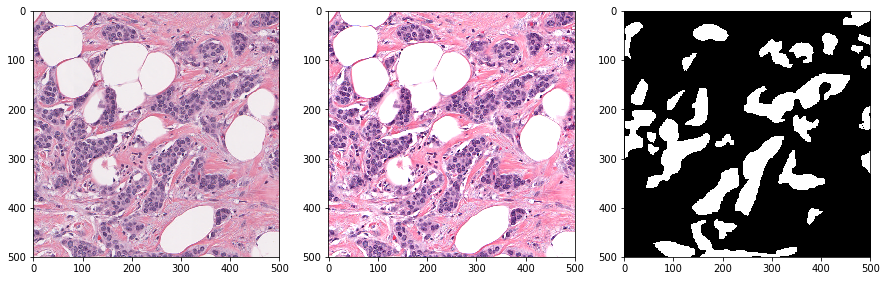

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(image)
ax2.imshow(image_t)
ax3.imshow(mask_t, cmap='gray')

## Test sample patch

In [15]:
image.shape, mask.shape

((500, 500, 3), (500, 500))

In [16]:
image[0:100,0:100].shape, mask[0:100,0:100].shape

((100, 100, 3), (100, 100))

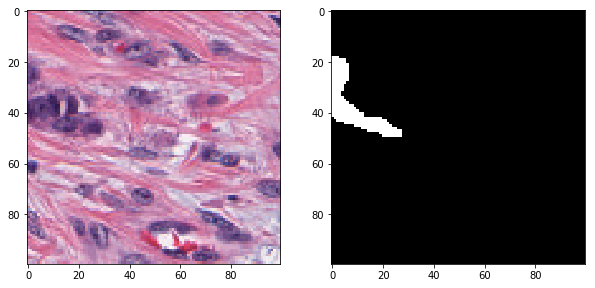

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(image[0:100,0:100], cmap='gray')
ax2.imshow(mask[0:100,0:100], cmap='gray')

In [18]:
transform = ImageMaskTransformsCompose([
    SamplePatch(224)
])

SamplePatch (224, 224, 3) (224, 224)


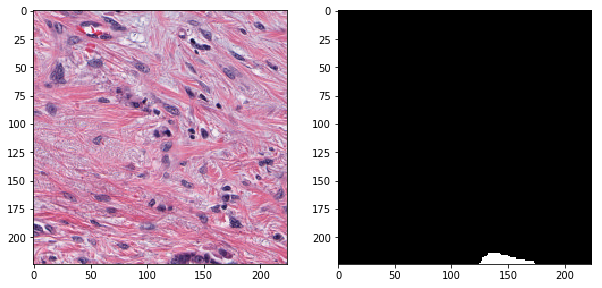

In [19]:
image_t, mask_t = transform(image, mask)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(image_t)
ax2.imshow(mask_t, cmap='gray')